# Project Title
## Computational social media- Project
### Saeed Rad, Evgeniy Chervonenko, Valentine Santarelli

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from functools import reduce
import operator 
import matplotlib.pyplot as plt
%matplotlib inline


# Exploring dataset
50 k tweets geolocalised in Lausanne

## Overview

In [2]:
# load json twitter data
data= pd.read_json('../data/lausanne_50K.json',typ='frame',lines=True)
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'urls': [], 'user_mentions': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,"{'profile_text_color': '333333', 'id_str': '58..."
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'symbols': [], 'urls': [], 'user_mentions': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,"{'profile_text_color': 'C0A8A8', 'profile_back..."
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'urls': [], 'user_mentions': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,"{'profile_text_color': 'C0A8A8', 'url': None, ..."
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'symbols': [], 'urls': [], 'user_mentions': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,"{'profile_text_color': '333333', 'id_str': '71..."
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'urls': [{'url': 'https://t.co...",NaN,NaN,0,False,...,{'created_at': 'Sat Aug 01 09:14:12 +0000 2015...,{'$numberLong': '627406966093164544'},6.274070e+17,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,"{'profile_text_color': '8A2932', 'is_translato..."


### User's info

In [3]:
data['user'][0]

{'contributors_enabled': False,
 'created_at': 'Mon May 21 17:37:48 +0000 2012',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Insta: melo_km',
 'favourites_count': 380,
 'follow_request_sent': None,
 'followers_count': 163,
 'following': None,
 'friends_count': 65,
 'geo_enabled': True,
 'id': 586804968,
 'id_str': '586804968',
 'is_translator': False,
 'lang': 'fr',
 'listed_count': 1,
 'location': 'Brooklyn, NYC',
 'name': 'km',
 'notifications': None,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/586804968/1436931020',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/622993756371963905/qr67mz-D_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/62299375

### Cleaning and Extracting useful variable from dict

In [4]:

data['created_at']= pd.to_datetime(data['created_at'])
data['tweet_id']=data['_id'].map(lambda x: x['$oid'])
data['hashtags']=data['entities'].map(lambda x: x['hashtags'])
data['hashtags']= data['hashtags'].map(lambda x: [xi['text'].lower() for xi in x] if x != [] else np.nan)
data['user_id']=data['user'].map(lambda x: x['id'])
data['user_id']=data['user_id'].map(lambda x: x['$numberLong'] if isinstance(x,dict) else x)
data['user_lang']=data['user'].map(lambda x: x['lang'])
data['user_location']=data['user'].map(lambda x: x['location'])


## Basic statistics

In [5]:
data.describe()

,contributors,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id_str,retweet_count
count,0.0,50000.0,5.000000e+04,1.634000e+04,1.927100e+04,49958.000000,20941.000000,3.810000e+03,50000.0
mean,NaN,0.0,7.649092e+17,7.656941e+17,4.957148e+16,0.076364,0.009598,7.596949e+17,0.0
std,NaN,0.0,2.930100e+16,3.429869e+16,1.852219e+17,0.265583,0.097502,3.529139e+16,0.0
min,NaN,0.0,6.264847e+17,2.401283e+10,8.412000e+03,0.000000,0.000000,3.194941e+17,0.0
25%,NaN,0.0,7.374537e+17,7.375975e+17,1.547980e+08,0.000000,0.000000,7.367500e+17,0.0
50%,NaN,0.0,7.673406e+17,7.715668e+17,5.573253e+08,0.000000,0.000000,7.576861e+17,0.0
75%,NaN,0.0,7.888412e+17,7.921157e+17,2.483374e+09,0.000000,0.000000,7.847596e+17,0.0
max,NaN,0.0,8.145965e+17,8.145963e+17,8.135226e+17,1.000000,1.000000,8.145638e+17,0.0


## Temporal statistics

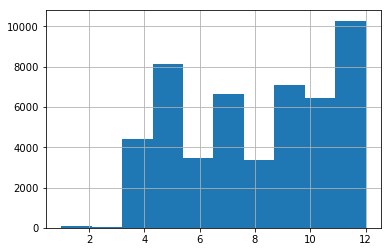

In [6]:
up_time= pd.DataFrame(columns=['year', 'month','date'])
up_time['date']=data['created_at']

up_months = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
up_time['month']=up_months

up_year = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
up_time['year']=up_year

up_months.hist()

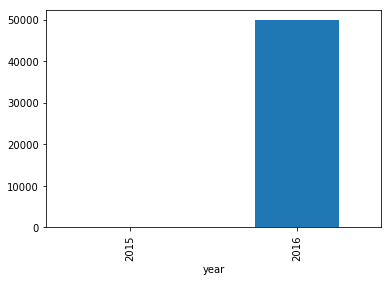

In [7]:
up_time.groupby('year')['date'].count().plot.bar()

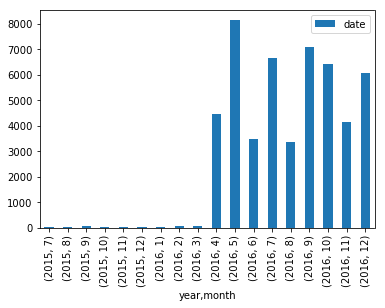

In [8]:
up_time.groupby(['year','month']).count().plot.bar()

## Number of characters

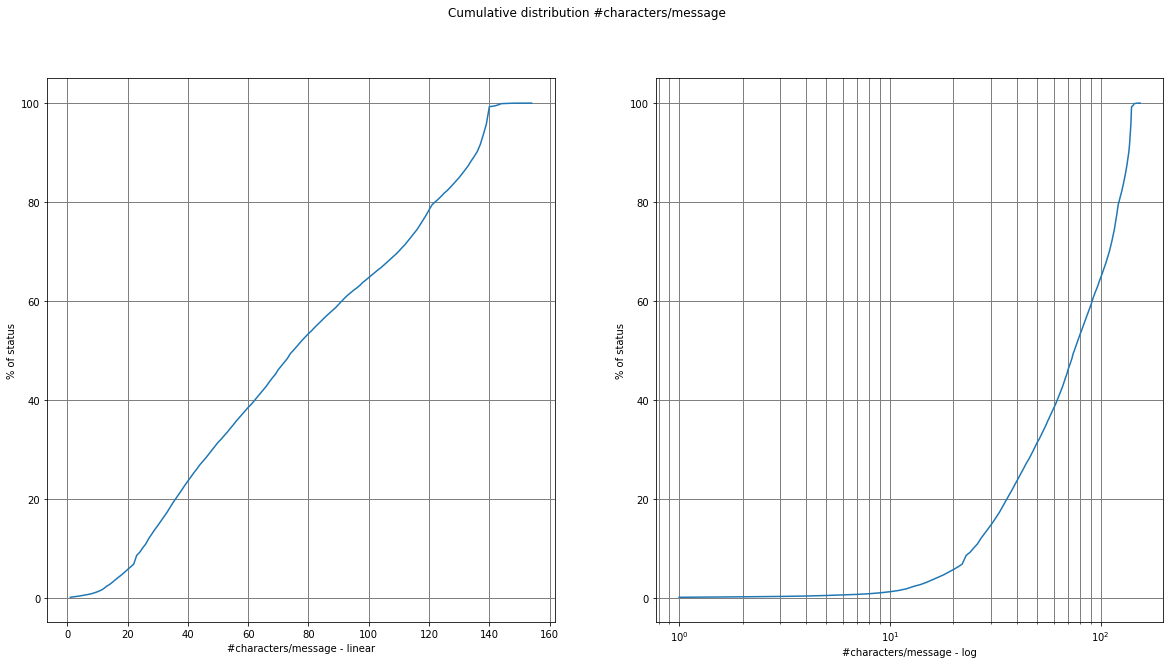

In [9]:
nb_characters = pd.DataFrame(data['text'].apply(lambda x : len(x)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.suptitle('Cumulative distribution #characters/message')

ax1.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax1.set_xlabel('#characters/message - linear')
ax1.set_ylabel('% of status')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax2.set_xscale('log')
ax2.set_xlabel('#characters/message - log')
ax2.set_ylabel('% of status')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

## Number of users

In [10]:
data['user_id'].unique().shape

(4462,)

# Finding groundtruth for local and unlocal users

## Tweet frequency per user

In [49]:
tweet_freq= data.groupby(by='user_id').count()
tweet_freq=tweet_freq['_id']
tweet_freq=tweet_freq.reset_index().rename(columns={'_id': 'tweet count'})
#tweet_freq.sort_values(by='tweet count')
print(tweet_freq.shape)

(4462, 2)


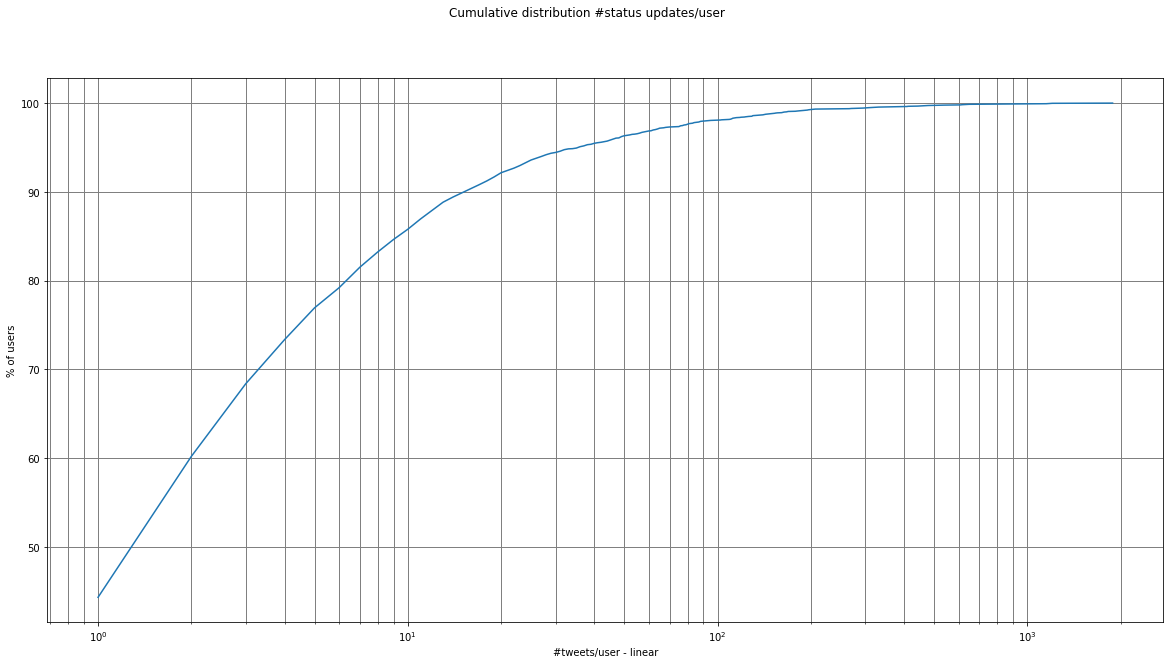

In [12]:
f, ax1 = plt.subplots(1, 1, figsize=(20,10))
f.suptitle('Cumulative distribution #status updates/user')

ax1.plot(pd.DataFrame(tweet_freq.sort_values(by='tweet count')).groupby('tweet count').count().cumsum()*100/tweet_freq.shape[0])
ax1.set_xlabel('#tweets/user - linear')
ax1.set_ylabel('% of users')
ax1.set_xscale('log')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

### Hashtag frequently used by users with 1 tweets

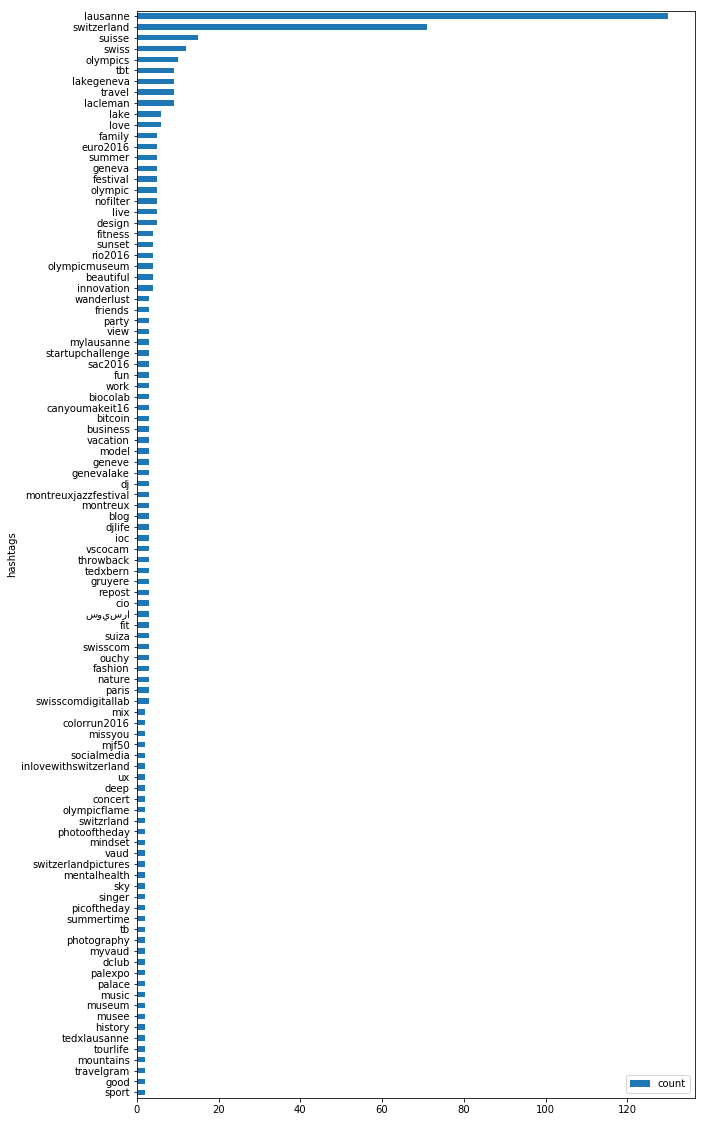

In [85]:
#recover user id with one tweet

users_1_tweet=tweet_freq[tweet_freq['tweet count']==1]['user_id']
data_1_tweet=data[[ x in list(users_1_tweet) for x in data['user_id']]]


def ComputeFrequentdHashtags(data):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    associated_hashtags= list(nan_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags ]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    return associated_hashtags.iloc[::-1]

frequent_hashtag_1=ComputeFrequentdHashtags(data_1_tweet)
#frequent_hashtag_1=frequent_hashtag_1.reset_index()
frequent_hashtag_1[frequent_hashtag_1['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20))

### Hashtag frequently used by users with more tweets

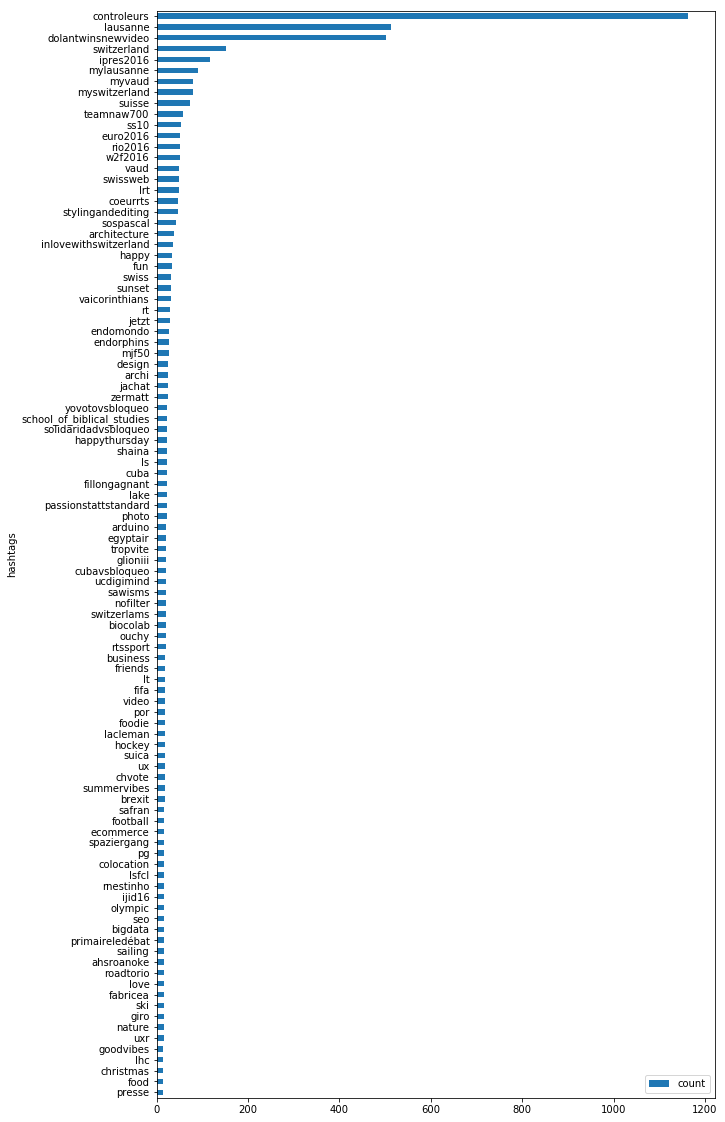

In [92]:
#recover user id with one tweet

users_multiple_tweet=tweet_freq[tweet_freq['tweet count'] > 10]['user_id']
data_multiple_tweet=data[[ x in list(users_multiple_tweet) for x in data['user_id']]]


def ComputeFrequentdHashtags(data):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    associated_hashtags= list(nan_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags ]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    return associated_hashtags.iloc[::-1]

frequent_hashtag_multiple=ComputeFrequentdHashtags(data_multiple_tweet)
#frequent_hashtag_multiple=frequent_hashtag_multiple.reset_index()
frequent_hashtag_multiple[frequent_hashtag_multiple['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20))

### Specific hashtags for users with only one tweet ore more than 10 tweets

In [94]:
# hashtag in the interesection 
def intersect(a, b):
    return list(set(a) & set(b))
intersect_ind=intersect(frequent_hashtag_1.index.values, frequent_hashtag_multiple.index.values)
intersect_ind

['ouchy',
 'mjf50',
 'biocolab',
 'mylausanne',
 'euro2016',
 'swiss',
 'nature',
 'lacleman',
 'sunset',
 'lake',
 'vaud',
 'olympic',
 'lausanne',
 'inlovewithswitzerland',
 'switzerland',
 'rio2016',
 'ux',
 'nofilter',
 'myvaud',
 'love',
 'suisse',
 'fun',
 'friends',
 'business',
 'design']

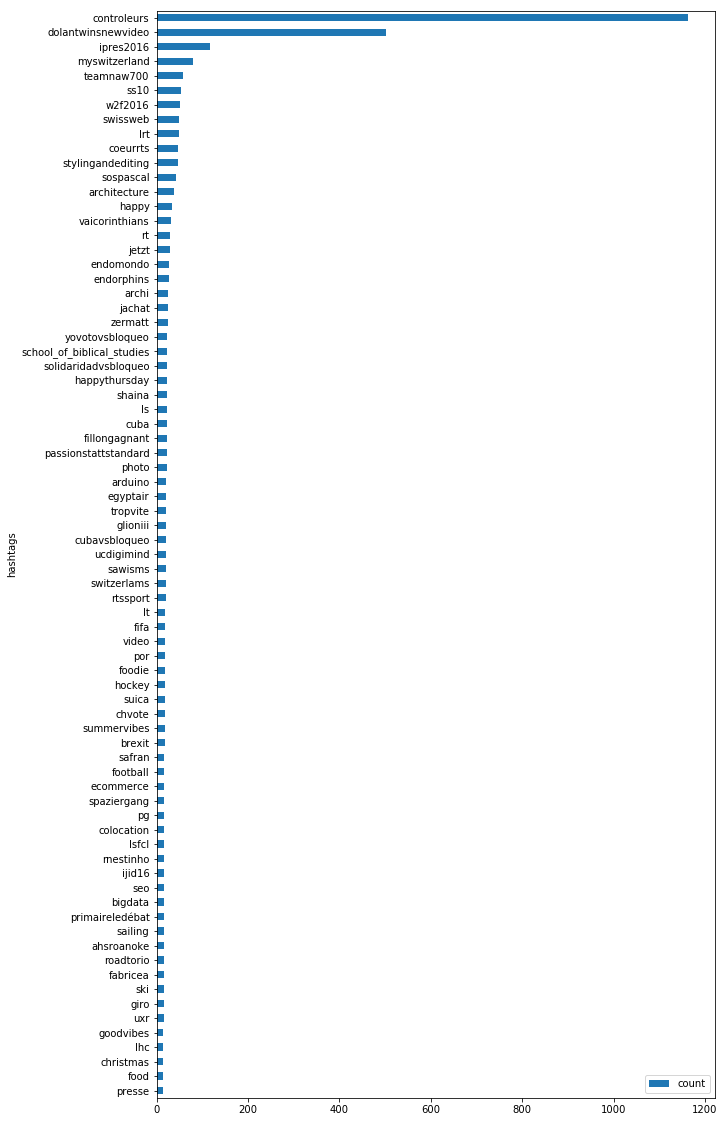

In [93]:
specific_to_multiple=frequent_hashtag_multiple[[x not in intersect_ind for x in frequent_hashtag_multiple.index.values]]
specific_to_multiple[specific_to_multiple['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20))

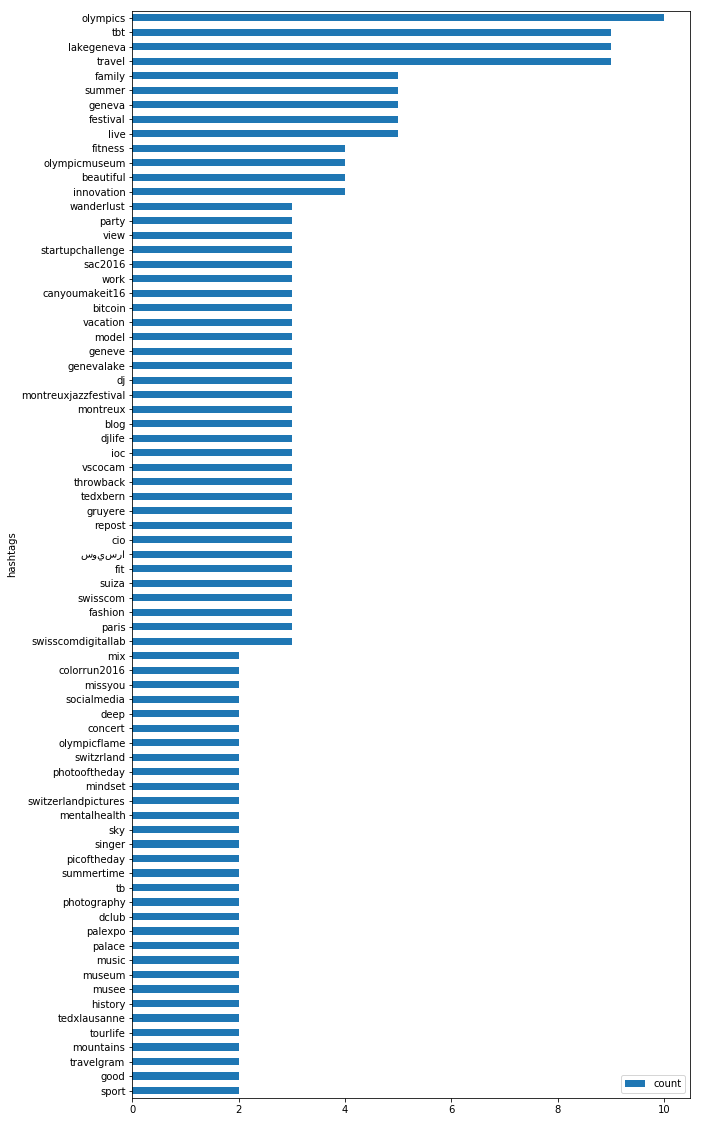

In [95]:
specific_to_1=frequent_hashtag_1[[x not in intersect_ind for x in frequent_hashtag_1.index.values]]
specific_to_1[specific_to_1['count']>1].iloc[::-1].plot(kind='barh', figsize=(10,20))

## Hashtags associated with \#lausanne
Filter by #lausanne  and Compute the hashtags associated with \#lausanne

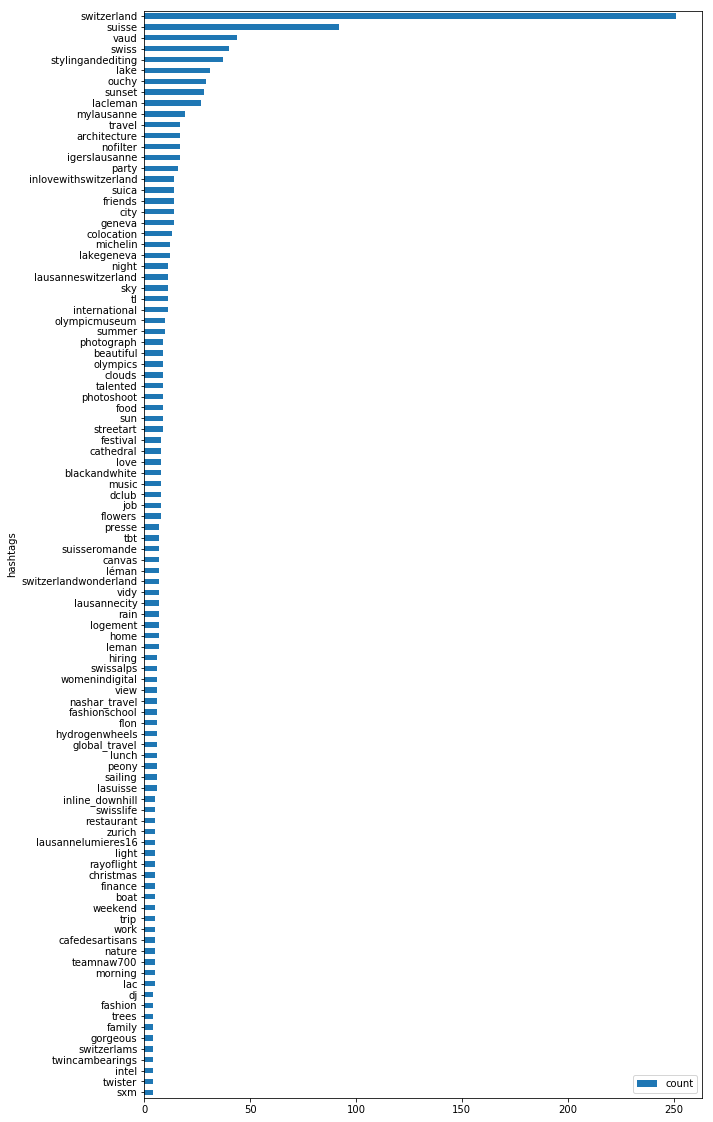

In [17]:
#Return 100 hashtags most associated with main_hashtags in the dataset df  with the count of  each hashtags
# also
def ComputeAssociatedHashtags(data, main_hashtag):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    #keep tweets with hashtag lausanne
    lausanne_hashtags=nan_hashtags[ [main_hashtag in x for x in list(nan_hashtags['hashtags'])] ]
    associated_hashtags= list(lausanne_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags if x!= main_hashtag]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    

    return associated_hashtags.iloc[::-1]

associated_lausanne= ComputeAssociatedHashtags(data, 'lausanne')
associated_lausanne.iloc[::-1].plot(kind='barh', figsize=(10,20))

## Find hashtags related to people visiting Lausanne

In [18]:
#exclude tweet without hashtags
nan_hashtags=data[~data['hashtags'].isnull()]

### \#visiting

(1, 38)


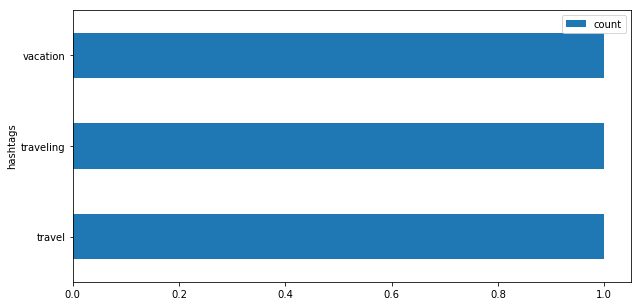

In [19]:
visiting_hashtags=nan_hashtags[ ['visiting' in x for x in list(nan_hashtags['hashtags'])] ]
print(visiting_hashtags.shape)
associated_visiting= ComputeAssociatedHashtags(data, 'visiting')
associated_visiting.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#visit

(2, 38)


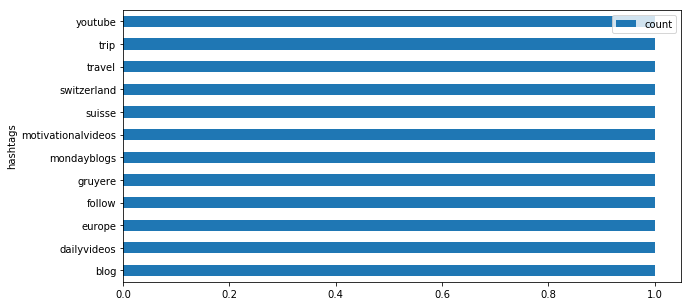

In [20]:
visit_hashtags=nan_hashtags[ ['visit' in x for x in list(nan_hashtags['hashtags'])] ]
print(visit_hashtags.shape)
associated_visit= ComputeAssociatedHashtags(data, 'visit')
associated_visit.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#tourism

(3, 38)


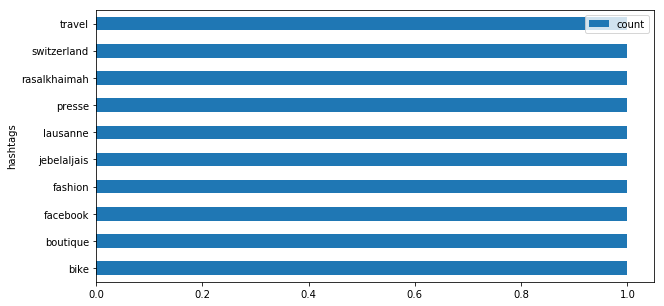

In [21]:
tourism_hashtags=nan_hashtags[ ['tourism' in x for x in list(nan_hashtags['hashtags'])] ]
print(tourism_hashtags.shape)
associated_tourism= ComputeAssociatedHashtags(data, 'tourism')
associated_tourism.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#vacances

(7, 38)


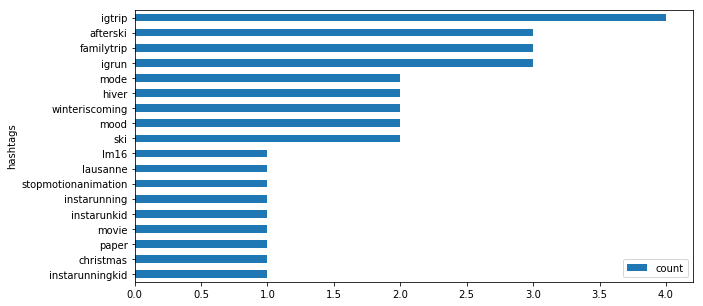

In [22]:
vacances_hashtags=nan_hashtags[ ['vacances' in x for x in list(nan_hashtags['hashtags'])] ]
print(vacances_hashtags.shape)
associated_vacances= ComputeAssociatedHashtags(data, 'vacances')
associated_vacances.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#vacation

(4, 38)


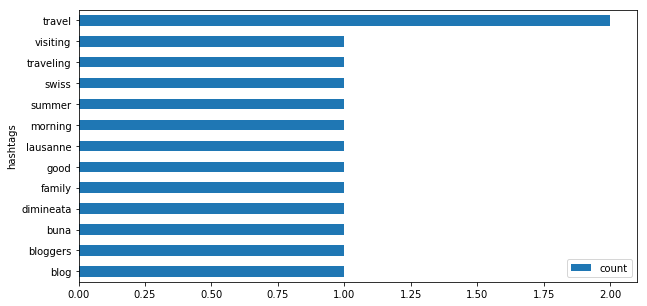

In [23]:
vacation_hashtags=nan_hashtags[ ['vacation' in x for x in list(nan_hashtags['hashtags'])] ]
print(vacation_hashtags.shape)
associated_vacation= ComputeAssociatedHashtags(data, 'vacation')
associated_vacation.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#holidays

(3, 38)


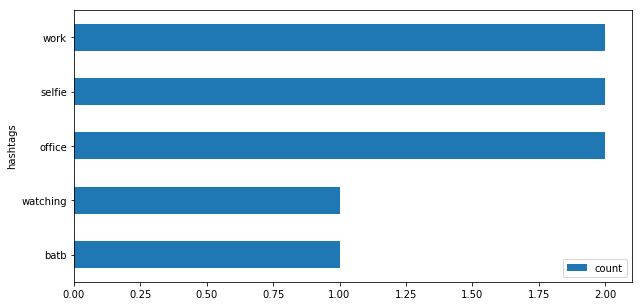

In [24]:
holydays_hashtags=nan_hashtags[ ['holidays' in x for x in list(nan_hashtags['hashtags'])] ]
print(holydays_hashtags.shape)
associated_holydays= ComputeAssociatedHashtags(data, 'holidays')
associated_holydays.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#holiday

(3, 38)


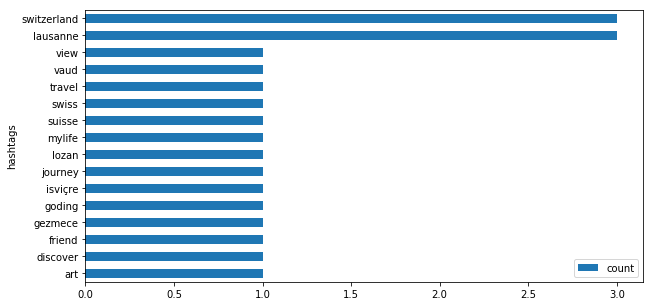

In [25]:
holyday_hashtags=nan_hashtags[ ['holiday' in x for x in list(nan_hashtags['hashtags'])] ]
print(holyday_hashtags.shape)
associated_holyday= ComputeAssociatedHashtags(data, 'holiday')
associated_holyday.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#travel

(52, 38)


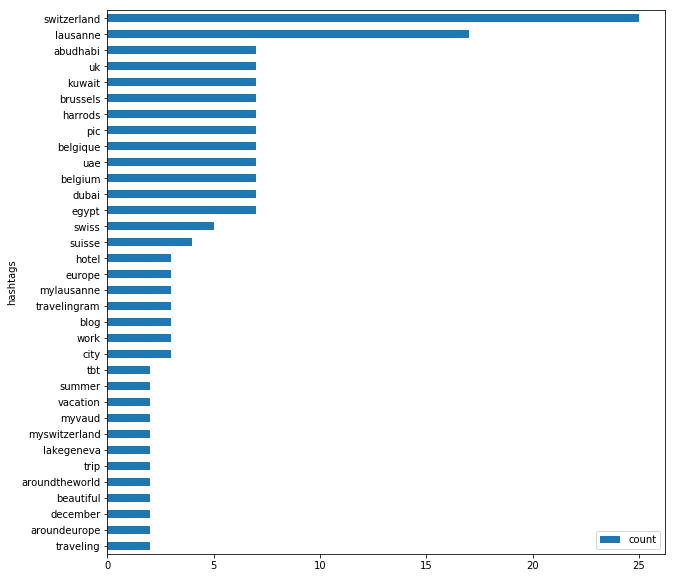

In [26]:
travel_hashtags=nan_hashtags[ ['travel' in x for x in list(nan_hashtags['hashtags'])] ]
print(travel_hashtags.shape)
associated_travel= ComputeAssociatedHashtags(data, 'travel')
associated_travel[associated_travel['count'] > 1].iloc[::-1].plot(kind='barh', figsize=(10,10))

### \#traveling

(3, 38)


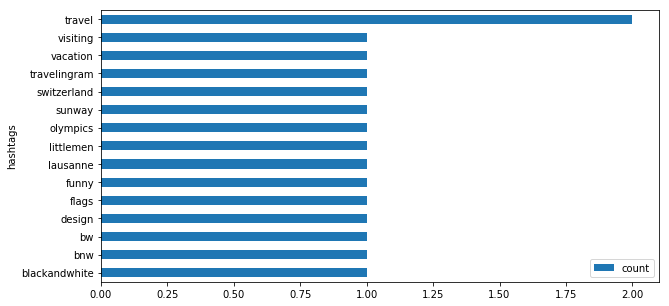

In [27]:
traveling_hashtags=nan_hashtags[ ['traveling' in x for x in list(nan_hashtags['hashtags'])] ]
print(traveling_hashtags.shape)
associated_traveling= ComputeAssociatedHashtags(data, 'traveling')
associated_traveling.iloc[::-1].plot(kind='barh', figsize=(10,5))

### \#trip

(9, 38)


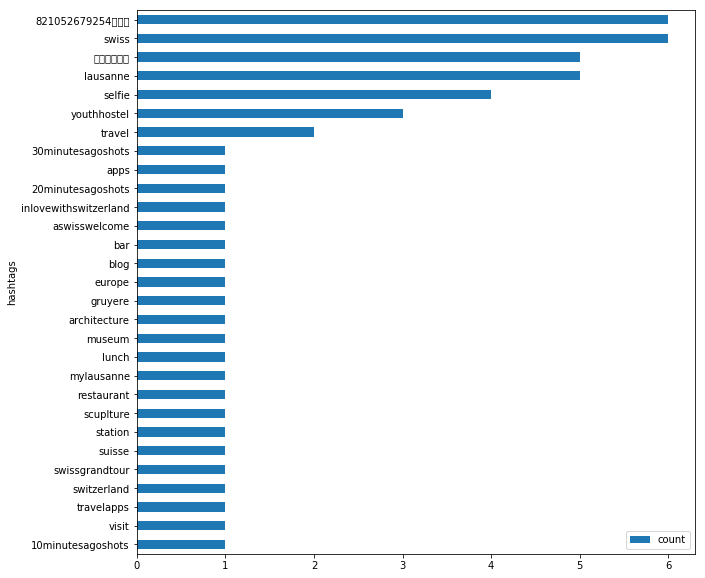

In [28]:
trip_hashtags=nan_hashtags[ ['trip' in x for x in list(nan_hashtags['hashtags'])] ]
print(trip_hashtags.shape)
associated_trip= ComputeAssociatedHashtags(data, 'trip')
associated_trip.iloc[::-1].plot(kind='barh', figsize=(10,10))

### \#hotel

(20, 38)


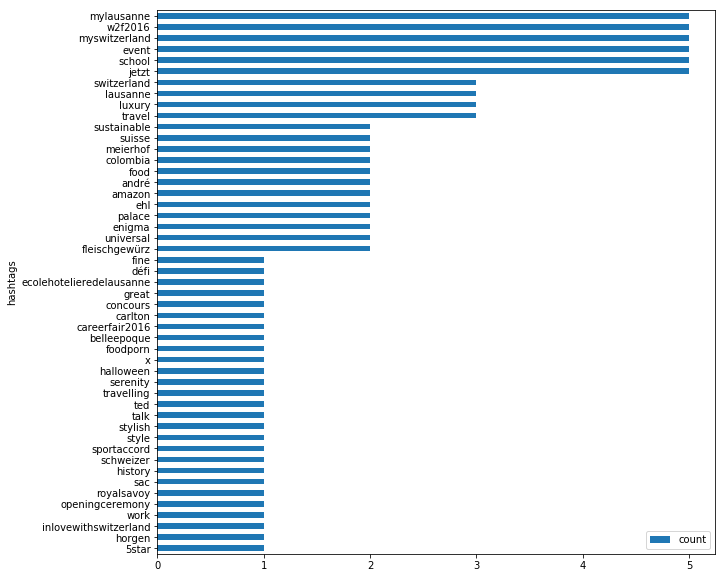

In [29]:
hotel_hashtags=nan_hashtags[ ['hotel' in x for x in list(nan_hashtags['hashtags'])] ]
print(hotel_hashtags.shape)
associated_hotel= ComputeAssociatedHashtags(data, 'hotel')
associated_hotel.iloc[::-1].plot(kind='barh', figsize=(10,10))

### \#airbnb

(1, 38)


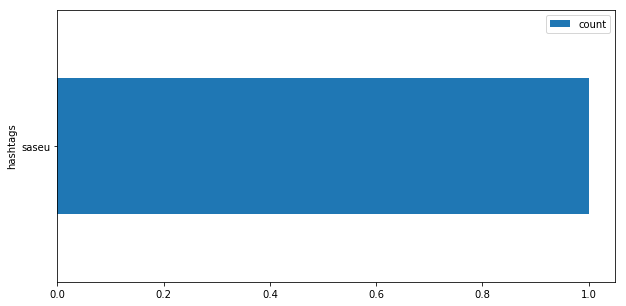

In [30]:
airbnb_hashtags=nan_hashtags[ ['airbnb' in x for x in list(nan_hashtags['hashtags'])] ]
print(airbnb_hashtags.shape)
associated_airbnb= ComputeAssociatedHashtags(data, 'airbnb')
associated_airbnb.iloc[::-1].plot(kind='barh', figsize=(10,5))

# Coordinates 

why is there some data without coordinates when it's tweet geolocalized in Lausanne ?

In [33]:
print(data.shape)
unlocalized_data= data[data['coordinates'].isnull()]
print(unlocalized_data.shape)

(50000, 38)
(43375, 38)


In [34]:
import folium

#create and display map (centered on Lausanne) of tweets
#df : tweets dataset, with
#popup_col: column values to show on popup, color_hx: hexadecimal color code for the tweet markers
#function already filter tweets to plot those with coordinates
def tweetMap(df,popup_col,color_hx):
    localized_data= df[~df['coordinates'].isnull()]
    localized_data['coordinates']= localized_data['coordinates'].map(lambda x: x['coordinates'])
    map_lausanne = folium.Map(location=[46.533340, 6.623380], zoom_start=12)
    localized_data.apply(lambda x: folium.CircleMarker([x['coordinates'][1],x['coordinates'][0]],radius=5,color=color_hx, fill_color=color_hx, fill=True, fill_opacity=0.7, popup=folium.Popup(x[popup_col], parse_html=True)).add_to(map_lausanne), axis =1 )
    return map_lausanne
    
map_lausanne = tweetMap(data[1:2000], 'text','#ff0000')
map_lausanne

/Users/valentine/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Sentiment analysis

# Languages 

In [36]:
for lang, group in data.groupby('lang'):
    print('lang: {}'.format(lang))
    group=group[['user_id', 'lang', 'text', '_id']].sort_values('user_id')
    print(group.head())

lang: am
         user_id lang             text                                   _id
3184  3041208063   am  ዶግ\nኽጌችችክግዴግችድዽ  {'$oid': '571c945f0a17762e8f8e099b'}
lang: ar


TypeError: unorderable types: str() < int()

# Tweets with user location set in Lausanne

In [37]:
print(data.shape)
local_data = data[[('Lausanne' in x)  if x != None else False for x in data['user_location'] ]]
print(local_data.shape)

(50000, 38)
(17811, 38)


In [38]:
local_user=local_data['user_id'].map(lambda x: x['$numberLong'] if isinstance(x,dict) else x)
local_user.unique().shape

(645,)

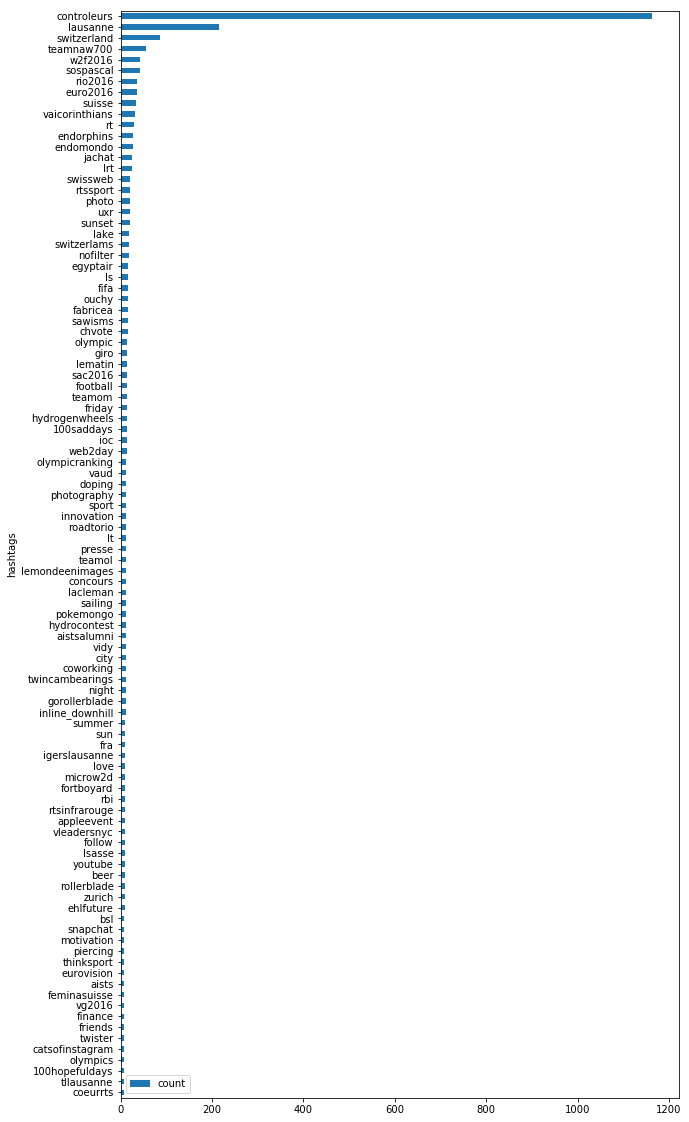

In [97]:
local_hashtags= ComputeFrequentdHashtags(data=local_data)
local_hashtags.iloc[::-1].plot(kind='barh', figsize=(10,20))

# Retweet

In [ ]:
data[data['retweet_count']==0]
#print(data['retweet_count'])

In [ ]:
data[]

In [ ]:
local_data['user_id'].unique()

# Number of image

In [ ]:
entities= data['entities']

In [ ]:

def has_media(x):
    try :
        x['media']
        return True
    except:
        return False
    
media= [x['media'] for x in entities  if has_media(x)==True]

In [ ]:
len(media)

In [ ]:
media[0][0]['type']

In [ ]:
media

In [ ]:
def has_photo(x):
    try :
        return x[0]['type']=='video'
    except:
        return False

media_photo=[x for x in media if has_photo(x)== True]
len(media_photo)

#  Retweet count Evgeniy

In [ ]:
data_bis= pd.read_json('../data/lausanne_50K_evgeniy.json',typ='frame',lines=True)

In [ ]:
data_bis[data_bis['retweet_count']!=0]